Evaluate genes notebook
=======================

### Load pathes and dependencies ###

In [1]:
from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"

/data/sources/species/notebooks/..


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_by_class = genes_dir / "by_animal_class"
path_all = genes_dir / "all"

def kids(folder: Path):    
    for d in folder.iterdir():
        print(d.absolute())
kids(genes_dir)

/data/sources/species/notebooks/../data/input/genes/by_animal_class
/data/sources/species/notebooks/../data/input/genes/all


In [4]:
animal_classes = [ "Mammalia", "Aves", "Reptilia", "Teleostei", "Chondrichthyes", "Coelacanthi" ]


## Load gene tables ##

In [5]:
def load_table(path: Path):    
    return pd.read_csv(str(path), sep="\t")

from dataclasses import dataclass
@dataclass
class OrthologyTable:
    one2one: pd.DataFrame
    one2many: pd.DataFrame
    many2many: pd.DataFrame
    all: pd.DataFrame
        
def load_tables(folder :Path) -> OrthologyTable:
    return OrthologyTable(load_table(folder / "one2one.tsv"), load_table(folder / "one2many.tsv"), load_table(folder / "many2many.tsv"), load_table(folder / "all.tsv"))

species = load_tables(path_all)
species.all.head(10)

,:Homo_sapiens,:Strigops_habroptila,:Gallus_gallus,:Parus_major,:Zonotrichia_albicollis,:Cyanistes_caeruleus,:Meleagris_gallopavo,:Taeniopygia_guttata,:Coturnix_japonica,:Callorhinchus_milii,:Latimeria_chalumnae,:Pan_troglodytes,:Equus_caballus,:Pan_paniscus,:Tursiops_truncatus,:Macaca_mulatta,:Macaca_fascicularis,:Macaca_nemestrina,:Ailuropoda_melanoleuca,:Ursus_americanus,:Heterocephalus_glaber,:Rhinolophus_ferrumequinum,:Felis_catus,:Sus_scrofa,:Bos_grunniens,:Ovis_aries,:Callithrix_jacchus,:Ornithorhynchus_anatinus,:Phascolarctos_cinereus,:Capra_hircus,:Suricata_suricatta,:Bos_taurus,:Otolemur_garnettii,:Microcebus_murinus,:Sarcophilus_harrisii,:Cavia_porcellus,:Erinaceus_europaeus,:Tupaia_belangeri,:Oryctolagus_cuniculus,:Meriones_unguiculatus,:Cavia_aperea,:Monodelphis_domestica,:Mus_musculus,:Mesocricetus_auratus,:Rattus_norvegicus,:Mus_spicilegus,:Gopherus_agassizii,:Pogona_vitticeps,:Anolis_carolinensis,:Esox_lucius,:Scophthalmus_maximus,:Clupea_harengus,:Electrophorus_electricus,:Neogobius_melanostomus,:Betta_splendens
0,ens:ENSG00000242265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ens:ENSPTRG00000023648,ens:ENSECAG00000001603,ens:ENSPPAG00000030053,ens:ENSTTRG00000003114,ens:ENSMMUG00000032524,ens:ENSMFAG00000045560,ens:ENSMNEG00000037924,ens:ENSAMEG00000019304,NaN,NaN,ens:ENSRFEG00010011916,ens:ENSFCAG00000041002,ens:ENSSSCG00000036049,ens:ENSBGRG00000010269,ens:ENSOARG00000002475,ens:ENSCJAG00000033086,NaN,ens:ENSPCIG00000028966,NaN,ens:ENSSSUG00005000112,ens:ENSBTAG00000053735,ens:ENSOGAG00000031169,ens:ENSMICG00000001469,ens:ENSSHAG00000001273,ens:ENSCPOG00000037165,NaN,NaN,ens:ENSOCUG00000027535,ens:ENSMUGG00000022866;ens:ENSMUGG00000022860,ens:ENSCAPG00000010493,NaN,ens:ENSMUSG00000092035,ens:ENSMAUG00000018656,NaN,ens:ENSMSIG00000000323,NaN,ens:ENSPVIG00000005921;ens:ENSPVIG00000012703;...,ens:ENSACAG00000027111;ens:ENSACAG00000024362;...,ens:ENSELUG00000022573,NaN,ens:ENSCHAG00000025875;ens:ENSCHAG00000003351,NaN,ens:ENSNMLG00000010098;ens:ENSNMLG00000020950;...,ens:ENSBSLG00000009545;ens:ENSBSLG00000008226;...
1,ens:ENSG00000139990,ens:ENSSHBG00005019456,ens:ENSGALG00000009463,NaN,ens:ENSZALG00000006773,ens:ENSCCEG00000014295,ens:ENSMGAG00000011878,ens:ENSTGUG00000011473,ens:ENSCJPG00005014994,ens:ENSCMIG00000010543,ens:ENSLACG00000018589,ens:ENSPTRG00000006478,ens:ENSECAG00000010524,ens:ENSPPAG00000042013,ens:ENSTTRG00000013941,ens:ENSMMUG00000019346,ens:ENSMFAG00000003413,ens:ENSMNEG00000028207,ens:ENSAMEG00000014443,ens:ENSUAMG00000010770,ens:ENSHGLG00100003336;ens:ENSHGLG00100017958;...,ens:ENSRFEG00010004811,ens:ENSFCAG00000029516,ens:ENSSSCG00000039701,ens:ENSBGRG00000007044,ens:ENSOARG00000021180,ens:ENSCJAG00000042954,ens:ENSOANG00000012620,ens:ENSPCIG00000010372,ens:ENSCHIG00000021848,ens:ENSSSUG00005006529,ens:ENSBTAG00000048519,ens:ENSOGAG00000008452,ens:ENSMICG00000046667,ens:ENSSHAG00000000665,ens:ENSCPOG00000032392,ens:ENSEEUG00000011616,NaN,ens:ENSOCUG00000010281,ens:ENSMUGG00000023917,ens:ENSCAPG00000014053,ens:ENSMODG00000010219,ens:ENSMUSG00000049106,ens:ENSMAUG00000004350,ens:ENSRNOG00000004556,ens:ENSMSIG00000015740,ens:ENSGAGG00000023900,ens:ENSPVIG00000012940,ens:ENSACAG00000022738;ens:ENSACAG00000005347,ens:ENSELUG00000020498,ens:ENSSMAG00000010619,ens:ENSCHAG00000007730,ens:ENSEEEG00000006949,ens:ENSNMLG00000005834,ens:ENSBSLG00000023476
2,ens:ENSG00000073921,ens:ENSSHBG00005016076,ens:ENSGALG00000039037,ens:ENSPMJG00000001746,ens:ENSZALG00000008097,ens:ENSCCEG00000001773,ens:ENSMGAG00000015241;ens:ENSMGAG00000017262,ens:ENSTGUG00000012969,ens:ENSCJPG00005004383,ens:ENSCMIG00000014421,ens:ENSLACG00000014492,ens:ENSPTRG00000004141,ens:ENSECAG00000019264,ens:ENSPPAG00000036162,ens:ENSTTRG00000001554,ens:ENSMMUG00000019618,ens:ENSMFAG00000002978,ens:ENSMNEG00000029285,ens:ENSAMEG00000008778,ens:ENSUAMG00000018059,ens:ENSHGLG00100018440,ens:ENSRFEG00010012989,ens:ENSFCAG00000029123,ens:ENSSSCG00000014913,ens:ENSBGRG00000024679,ens:ENSOARG00000004654,ens:ENSCJAG00000014262,ens:ENSOANG000000

In [6]:
birds = load_tables(path_by_class / "Aves")
reptiles = load_tables(path_by_class / "Reptilia")
mammals = load_tables(path_by_class / "Mammalia")
mammals.all.head(4)

,:Homo_sapiens,:Pan_troglodytes,:Equus_caballus,:Pan_paniscus,:Tursiops_truncatus,:Macaca_mulatta,:Macaca_fascicularis,:Macaca_nemestrina,:Ailuropoda_melanoleuca,:Ursus_americanus,:Heterocephalus_glaber,:Rhinolophus_ferrumequinum,:Felis_catus,:Sus_scrofa,:Bos_grunniens,:Ovis_aries,:Callithrix_jacchus,:Ornithorhynchus_anatinus,:Phascolarctos_cinereus,:Capra_hircus,:Suricata_suricatta,:Bos_taurus,:Otolemur_garnettii,:Microcebus_murinus,:Sarcophilus_harrisii,:Cavia_porcellus,:Erinaceus_europaeus,:Tupaia_belangeri,:Oryctolagus_cuniculus,:Meriones_unguiculatus,:Cavia_aperea,:Monodelphis_domestica,:Mus_musculus,:Mesocricetus_auratus,:Rattus_norvegicus,:Mus_spicilegus
0,ens:ENSG00000242265,ens:ENSPTRG00000023648,ens:ENSECAG00000001603,ens:ENSPPAG00000030053,ens:ENSTTRG00000003114,ens:ENSMMUG00000032524,ens:ENSMFAG00000045560,ens:ENSMNEG00000037924,ens:ENSAMEG00000019304,NaN,NaN,ens:ENSRFEG00010011916,ens:ENSFCAG00000041002,ens:ENSSSCG00000036049,ens:ENSBGRG00000010269,ens:ENSOARG00000002475,ens:ENSCJAG00000033086,NaN,ens:ENSPCIG00000028966,NaN,ens:ENSSSUG00005000112,ens:ENSBTAG00000053735,ens:ENSOGAG00000031169,ens:ENSMICG00000001469,ens:ENSSHAG00000001273,ens:ENSCPOG00000037165,NaN,NaN,ens:ENSOCUG00000027535,ens:ENSMUGG00000022866;ens:ENSMUGG00000022860,ens:ENSCAPG00000010493,NaN,ens:ENSMUSG00000092035,ens:ENSMAUG00000018656,NaN,ens:ENSMSIG00000000323
1,ens:ENSG00000139990,ens:ENSPTRG00000006478,ens:ENSECAG00000010524,ens:ENSPPAG00000042013,ens:ENSTTRG00000013941,ens:ENSMMUG00000019346,ens:ENSMFAG00000003413,ens:ENSMNEG00000028207,ens:ENSAMEG00000014443,ens:ENSUAMG00000010770,ens:ENSHGLG00100003336;ens:ENSHGLG00100017958;...,ens:ENSRFEG00010004811,ens:ENSFCAG00000029516,ens:ENSSSCG00000039701,ens:ENSBGRG00000007044,ens:ENSOARG00000021180,ens:ENSCJAG00000042954,ens:ENSOANG00000012620,ens:ENSPCIG00000010372,ens:ENSCHIG00000021848,ens:ENSSSUG00005006529,ens:ENSBTAG00000048519,ens:ENSOGAG00000008452,ens:ENSMICG00000046667,ens:ENSSHAG00000000665,ens:ENSCPOG00000032392,ens:ENSEEUG00000011616,NaN,ens:ENSOCUG00000010281,ens:ENSMUGG00000023917,ens:ENSCAPG00000014053,ens:ENSMODG00000010219,ens:ENSMUSG00000049106,ens:ENSMAUG00000004350,ens:ENSRNOG00000004556,ens:ENSMSIG00000015740
2,ens:ENSG00000073921,ens:ENSPTRG00000004141,ens:ENSECAG00000019264,ens:ENSPPAG00000036162,ens:ENSTTRG00000001554,ens:ENSMMUG00000019618,ens:ENSMFAG00000002978,ens:ENSMNEG00000029285,ens:ENSAMEG00000008778,ens:ENSUAMG00000018059,ens:ENSHGLG00100018440,ens:ENSRFEG00010012989,ens:ENSFCAG00000029123,ens:ENSSSCG00000014913,ens:ENSBGRG00000024679,ens:ENSOARG00000004654,ens:ENSCJAG00000014262,ens:ENSOANG00000013205,ens:ENSPCIG00000018862,ens:ENSCHIG00000015634,ens:ENSSSUG00005014072,ens:ENSBTAG00000001657,ens:ENSOGAG00000013950,ens:ENSMICG00000017261,ens:ENSSHAG00000004629,ens:ENSCPOG00000020758,ens:ENSEEUG00000013932,ens:ENSTBEG00000000600,ens:ENSOCUG00000023809,ens:ENSMUGG00000002616,ens:ENSCAPG00000000355,ens:ENSMODG00000004297,ens:ENSMUSG00000039361,ens:ENSMAUG00000011448,ens:ENSRNOG00000018322,ens:ENSMSIG00000002381
3,ens:ENSG00000139687,ens:ENSPTRG00000005864,ens:ENSECAG00000014575,ens:ENSPPAG00000002165,ens:ENSTTRG00000004232,ens:ENSMMUG00000007891,ens:ENSMFAG00000004544,ens:ENSMNEG00000030265,ens:ENSAMEG00000003640,ens:ENSUAMG00000011956,ens:ENSHGLG00100008595,ens:ENSRFEG00010000766,ens:ENSFCAG00000024529,ens:ENSSSCG00000009401,ens:ENSBGRG00000020100,ens:ENSOARG00000008246,ens:ENSCJAG00000009076,ens:ENSOANG00000031580;ens:ENSOANG00000015555,ens:ENSPCIG00000029307,ens:ENSCHIG00000004374,ens:ENSSSUG00005003247,ens:ENSBTAG00000006640,ens:ENSOGAG00000007461,ens:ENSMICG00000001747,ens:ENSSHAG00000014024,ens:ENSCPOG00000008683,ens:ENSEEUG00000000076,ens:ENSTBEG00000014454,ens:ENSOCUG00000016404,ens:ENSMUGG00000019124,ens:ENSCAPG00000014795,ens:ENSMODG00000011168,ens:ENSMUSG00000022105,ens:ENSMAUG00000020865,ens:ENSRNOG00000016029,ens:ENSMSIG00000007265


# Missing value analysis #

## Plot missing genes for all species and mammals (one2one and all modes) ##

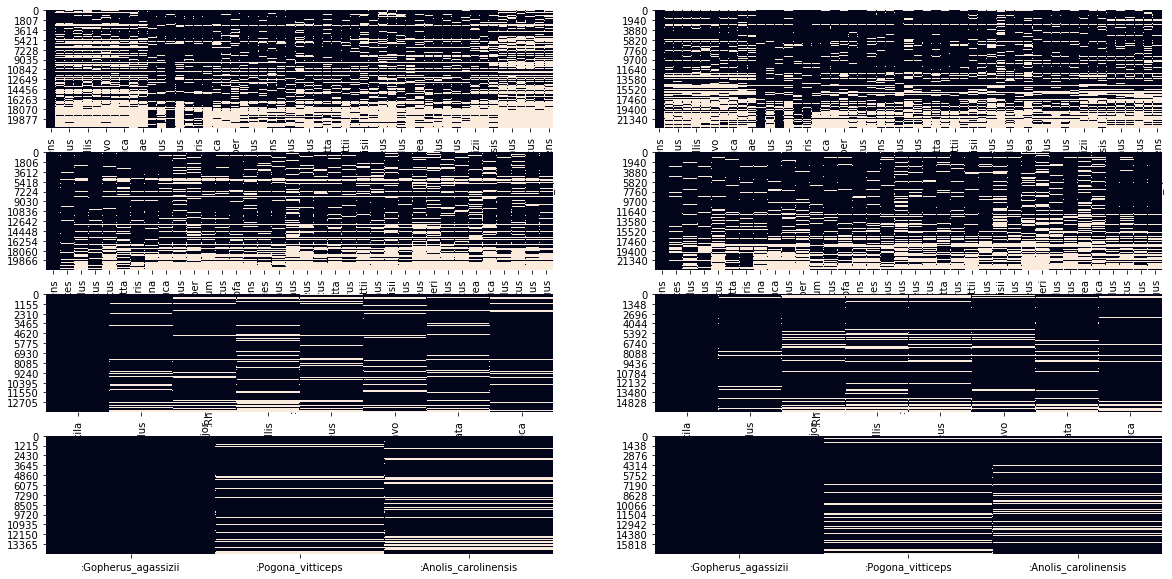

In [7]:
fig, axs = plt.subplots(4,2,figsize=(20,10))
sns.heatmap(species.one2one.isnull(), cbar=False,ax=axs[0,0])
sns.heatmap(species.all.isnull(), cbar=False,ax=axs[0,1])
sns.heatmap(mammals.one2one.isnull(), cbar=False,ax=axs[1,0])
sns.heatmap(mammals.all.isnull(), cbar=False,ax=axs[1,1])
sns.heatmap(birds.one2one.isnull(), cbar=False,ax=axs[2,0])
sns.heatmap(birds.all.isnull(), cbar=False,ax=axs[2,1])
sns.heatmap(reptiles.one2one.isnull(), cbar=False,ax=axs[3,0])
sns.heatmap(reptiles.all.isnull(), cbar=False,ax=axs[3,1])

Load samples and species
------------------------

In [8]:
kids(input_dir)

/data/sources/species/notebooks/../data/input/genes
/data/sources/species/notebooks/../data/input/.gitignore
/data/sources/species/notebooks/../data/input/samples.tsv
/data/sources/species/notebooks/../data/input/species.tsv
/data/sources/species/notebooks/../data/input/expressions


In [9]:
mams = mammals.all.isna().sum().sort_values(ascending=False)
mams

:Erinaceus_europaeus          9665
:Tupaia_belangeri             9159
:Cavia_aperea                 9056
:Ornithorhynchus_anatinus     8630
:Sarcophilus_harrisii         7175
:Tursiops_truncatus           6852
:Heterocephalus_glaber        6559
:Mesocricetus_auratus         6539
:Monodelphis_domestica        6410
:Oryctolagus_cuniculus        6261
:Ursus_americanus             5980
:Meriones_unguiculatus        5961
:Phascolarctos_cinereus       5940
:Ailuropoda_melanoleuca       5518
:Mus_spicilegus               5450
:Otolemur_garnettii           5443
:Cavia_porcellus              5428
:Microcebus_murinus           5258
:Bos_grunniens                5227
:Suricata_suricatta           4952
:Sus_scrofa                   4872
:Rhinolophus_ferrumequinum    4744
:Rattus_norvegicus            4723
:Macaca_nemestrina            4707
:Ovis_aries                   4660
:Felis_catus                  4524
:Capra_hircus                 4505
:Equus_caballus               4376
:Bos_taurus         

In [10]:
samples = load_table(input_dir / "samples.tsv")
samples.head(5)

,bioproject,series,run,species,tissue,sample_name,characterists,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol
ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287653,:Ailuropoda_melanoleuca,:Blood,SL01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,19,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-03-09 18:13:39.812,NaN,NaN
ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287654,:Ailuropoda_melanoleuca,:Blood,XB01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,12,male,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-02-18 18:40:17.122,NaN,NaN
ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287655,:Ailuropoda_melanoleuca,:Blood,XB02,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,6,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,128,2020-02-20 15:23:40.197,NaN,NaN
ncbi:bioproject/PRJNA293919,ncbi:bioproject/PRJNA293919,sra:SRR2308103,:Ailuropoda_melanoleuca,:Liver,PandaM_liver,'Tumor:no;sample_type:tissue sample;dev_stage:...,samples:Illumina_Genome_Analyzer_IIx,NaN,male,samples:no,liver,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Ailuropoda melanoleuca Transcriptome or Gene e...,1.1.0,samples:PAIRED,samples:PolyA,samples:RNA-Seq,A,96,2020-02-19 01:14:45.21,NaN,NaN
ncbi:bioproject/PRJNA176589,ncbi:bioproject/PRJNA176589,sra:SRR579557,:Anolis_carolinensis,:Kidney,GSM1015162,'Tumor:no;age:adult;sex:mixed;molecule subtype...,samples:Illumina_HiSeq_2000,adult,mixed,samples:no,kidney,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The evolutionary landscape of alternative spli...,1.1.0,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,2020-02-19 20:49:56.102,NaN,NaN


In [11]:
samples["species"]

ncbi:bioproject/PRJNA247712     :Blood
ncbi:bioproject/PRJNA247712     :Blood
ncbi:bioproject/PRJNA247712     :Blood
ncbi:bioproject/PRJNA293919     :Liver
ncbi:bioproject/PRJNA176589    :Kidney
                                ...   
ncbi:bioproject/PRJNA217789     :Brain
ncbi:bioproject/PRJNA217789     :Brain
ncbi:bioproject/PRJNA217789     :Brain
ncbi:bioproject/PRJNA231930     :Brain
ncbi:bioproject/PRJNA231930     :Brain
Name: species, Length: 533, dtype: object

In [ ]:
asns.heatmap(mammals_genes.isnull(), cbar=False)
plt.title("Mammals")
plt.show()

In [ ]:
one2one = pd.read_csv("/data/species/test_one2one.tsv", sep="\t")
one2many = pd.read_csv("/data/species/test_one2many.tsv", sep="\t")
many2many = pd.read_csv("/data/species/test_many2many.tsv", sep="\t")
all_together = pd.read_csv("/data/species/test_all.tsv", sep="\t")


In [ ]:
def process(df: pd.DataFrame) -> pd.DataFrame:
    return df.notnull().astype(int)

all_summed = process(one2one) + process(one2many) + process(many2many)
sns.heatmap(all_summed)

In [ ]:
sm = all_together.isnull().exclude(isnull=True)  + one2one.isnull().exclude(isnull=True)  + one2many.isnull().exclude(isnull=True)  + many2many.isnull() 
sm

In [ ]:
False + False + True + True

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=True)
sns.heatmap(one2one.isnull(), ax=axes[0, 0], cbar=False)
sns.heatmap(one2many.isnull(), ax=axes[0, 1], cbar=False)
sns.heatmap(many2many.isnull(), ax=axes[1, 0], cbar=False)
sns.heatmap(sm, ax=axes[1, 1], cbar=False)